In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [7]:
pd.set_option('display.max_rows', 100)

In [23]:
df = pd.read_csv('nodes_killed_experiments_w10.csv')
final_df = pd.read_csv('final_results_w10.csv')
df.head()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark,killed
0,1,4.940145,2.517560,0.954841,1.214246,20000000,1,3,3,spark
1,2,3.357663,1.704346,0.492302,0.468452,20000000,1,3,3,spark
2,3,1.988905,1.211606,0.143030,0.093442,20000000,1,3,3,spark
3,4,1.728833,1.156377,0.107349,0.087617,20000000,1,3,3,spark
4,5,1.880197,1.130288,0.145749,0.089815,20000000,1,3,3,spark


In [9]:
df.describe()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
count,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.0,144.0,144.0
mean,36.500000,23.240706,9.003594,30.921162,25.499016,1.998948e+07,1.0,3.0,3.0
std,20.855145,43.753190,18.985778,298.617671,176.924470,1.055672e+04,0.0,0.0,0.0
min,1.000000,1.295941,0.904721,0.059856,0.044936,1.997896e+07,1.0,3.0,3.0
25%,18.750000,1.757063,1.153416,0.131339,0.100794,1.997896e+07,1.0,3.0,3.0
50%,36.500000,1.843458,1.216549,0.158258,0.117883,1.998948e+07,1.0,3.0,3.0
75%,54.250000,5.512056,2.647143,0.912560,1.259144,2.000000e+07,1.0,3.0,3.0
max,72.000000,156.123226,94.708562,3544.764867,1871.213395,2.000000e+07,1.0,3.0,3.0


In [10]:
print(sorted(df.TotalMessages.unique() // 1e6))

[19.0, 20.0]


In [40]:
df[df.TotalMessages//1e6 == 0]

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
13322,1,5.548554,2.568634,1.140659,1.198049,384000,0,4,3
13323,2,1.851325,0.998977,0.387927,0.027752,384000,0,4,3
13324,3,2.650608,1.266573,0.049677,0.053123,384000,0,4,3
13325,4,1.517006,1.016248,0.010528,0.031695,384000,0,4,3
13326,5,1.763753,1.470298,0.033064,0.041206,384000,0,4,3
13327,6,1.564171,0.926319,0.007585,0.018103,384000,0,4,3
13328,7,1.765507,1.329168,0.024679,0.035845,384000,0,4,3
13329,8,1.503747,0.785766,0.004739,0.009180,384000,0,4,3
13330,9,1.602036,1.171414,0.019980,0.046920,384000,0,4,3
13331,10,1.345033,0.680251,0.003975,0.003171,384000,0,4,3


In [14]:
df[(df.kafka==3) & (df.spark==3) & (df.TotalMessages==5e6)].groupby(['iteration']).max()

df.groupby(['killed']).max()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
killed,,,,,,,,,
kafka,72,156.123226,94.708562,3544.764867,1871.213395,19978960,1,3,3
spark,72,4.940145,2.517560,0.954841,1.214246,20000000,1,3,3


In [13]:
df.groupby(['killed']).mean()

,rank,avg_EventLatency,avg_ProcessingLatency,var_EventLatency,var_ProcessingLatency,TotalMessages,iteration,kafka,spark
killed,,,,,,,,,
kafka,36.5,44.595975,16.782430,61.682278,50.863825,19978960.0,1.0,3.0,3.0
spark,36.5,1.885437,1.224757,0.160046,0.134207,20000000.0,1.0,3.0,3.0


<ErrorbarContainer object of 3 artists>

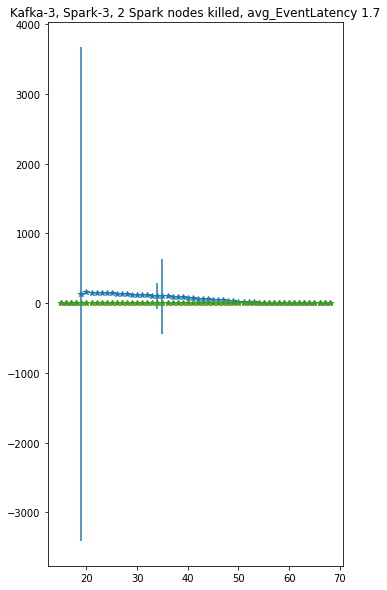

In [24]:
plt.figure(figsize=(18,10))

plt.subplot(1, 3, 1)
event_latencies = []
d = df[df["killed"] == 'kafka'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.2:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, 1 Kafka node killed, avg_EventLatency {np.round(event_latencies[-1],2)}')

plt.errorbar(d.index.values,
             d['avg_EventLatency'].values,
             d['var_EventLatency'].values, linestyle='None', marker='*')


plt.subplot(1, 3, 2)
event_latencies = []
d = df[df["killed"] == 'spark'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.2:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, 2 Spark nodes killed, avg_EventLatency {np.round(event_latencies[-1],2)}')

plt.errorbar(d.index.values,
             d['avg_EventLatency'].values,
             d['var_EventLatency'].values, linestyle='None', marker='*')

plt.subplot(1, 3, 3)
event_latencies = []
d = final_df[(final_df.kafka == 3) & (final_df.spark == 3) & (final_df.TotalMessages == 2e7)].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.2:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, 2 Spark nodes killed, avg_EventLatency {np.round(event_latencies[-1],2)}')

plt.errorbar(d.index.values,
             d['avg_EventLatency'].values,
             d['var_EventLatency'].values, linestyle='None', marker='*')

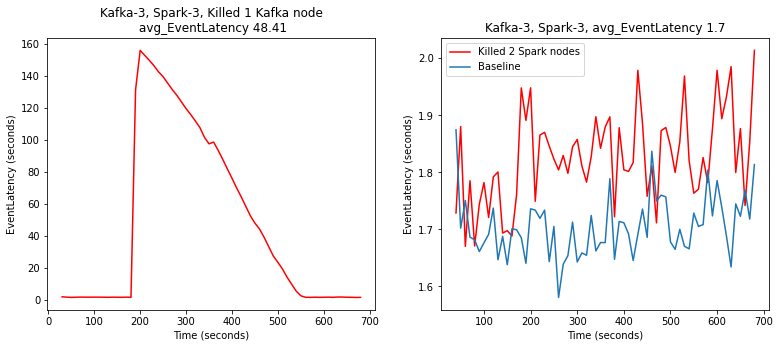

In [72]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
event_latencies = []
d = df[df["killed"] == 'kafka'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.03:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, Killed 1 Kafka node\n avg_EventLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('EventLatency (seconds)')
plt.plot(d.index.values*10, d['avg_EventLatency'].values, color='red')


plt.subplot(1, 3, 2)
event_latencies = []
d = df[df["killed"] == 'spark'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.05:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, Killed 2 Spark nodes\n avg_EventLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('EventLatency (seconds)')
plt.plot(d.index.values*10, d['avg_EventLatency'].values, label='Killed 2 Spark nodes', color='red')

# plt.subplot(1, 3, 3)
event_latencies = []
d = final_df[(final_df.kafka == 3) & (final_df.spark == 3) & (final_df.TotalMessages == 2e7)].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.05:d.shape[0] * 0.95]
event_latencies.append(d["avg_EventLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, avg_EventLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('EventLatency (seconds)')
plt.plot(d.index.values*10, d['avg_EventLatency'].values, label='Baseline')
plt.legend()

fig.savefig('fault-tolerance-event-latency.jpg')

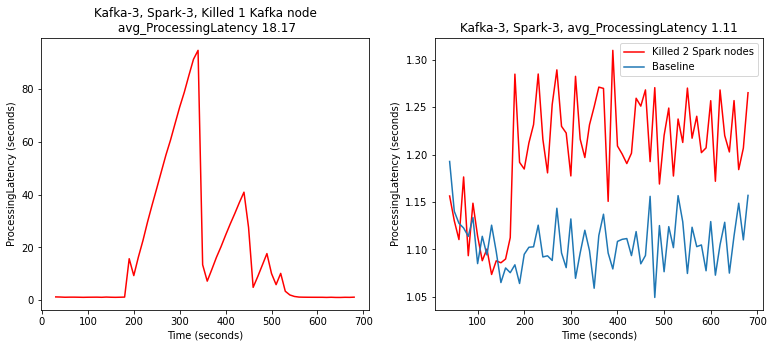

In [73]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
event_latencies = []
d = df[df["killed"] == 'kafka'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.03:d.shape[0] * 0.95]
event_latencies.append(d["avg_ProcessingLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, Killed 1 Kafka node\n avg_ProcessingLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('ProcessingLatency (seconds)')
plt.plot(d.index.values*10, d['avg_ProcessingLatency'].values, color='red')


plt.subplot(1, 3, 2)
event_latencies = []
d = df[df["killed"] == 'spark'].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.05:d.shape[0] * 0.95]
event_latencies.append(d["avg_ProcessingLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, Killed 2 Spark nodes\n avg_ProcessingLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('ProcessingLatency (seconds)')
plt.plot(d.index.values*10, d['avg_ProcessingLatency'].values, label='Killed 2 Spark nodes', color='red')

# plt.subplot(1, 3, 3)
event_latencies = []
d = final_df[(final_df.kafka == 3) & (final_df.spark == 3) & (final_df.TotalMessages == 2e7)].groupby('rank').mean()
d = d.loc[d.shape[0] * 0.05:d.shape[0] * 0.95]
event_latencies.append(d["avg_ProcessingLatency"].values.mean())
plt.title(f'Kafka-3, Spark-3, avg_ProcessingLatency {np.round(event_latencies[-1],2)}')
plt.xlabel('Time (seconds)')
plt.ylabel('ProcessingLatency (seconds)')
plt.plot(d.index.values*10, d['avg_ProcessingLatency'].values, label='Baseline')
plt.legend()

fig.savefig('fault-tolerance-processing-latency.jpg')